In [1]:
from AGM import compute_stats_GM, compute_FAD_GM
import glob
import os
import numpy as np
import matplotlib.pylab as plt

[Conv2d(257, 512, kernel_size=(1, 2), stride=(1, 1), bias=False), ReLU()]
[Conv2d(257, 512, kernel_size=(1, 4), stride=(1, 1), bias=False), ReLU()]
[Conv2d(257, 512, kernel_size=(1, 8), stride=(1, 1), bias=False), ReLU()]
[Conv2d(257, 512, kernel_size=(1, 16), stride=(1, 1), bias=False), ReLU()]
[Conv2d(257, 512, kernel_size=(1, 64), stride=(1, 1), bias=False), ReLU()]
[Conv2d(257, 512, kernel_size=(1, 128), stride=(1, 1), bias=False), ReLU()]


47.1142340306529
229.29226044914918
815.2027589774782
1512.8198946686239
1733.8536492583116
2710.7175074963807
3575.7354010464232
3910.200828888901
4518.502411054251
4637.395688709071


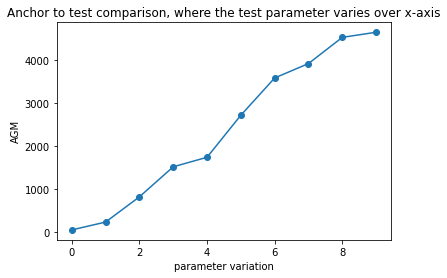

In [2]:
## This notebook takes the samples in the folder "samples", 
## assumes the first file to be the anchor, and the rest as test files
folder = '../samples'
filelist = glob.glob(folder+os.sep+'*.wav')
filelist.sort()
anchor = [filelist[0]]
#create anchor GM vector
mu_bg,sigma_bg = compute_stats_GM(anchor)

testfiles = filelist[1:]
agm_overall = np.zeros(len(testfiles))

cnt=0
for test in testfiles:
    #create test GM vector
    mu_test,sigma_test = compute_stats_GM([test])
    # compute FAD
    agm = compute_FAD_GM(mu_bg,mu_test,sigma_bg,sigma_test)
    print(agm)
    agm_overall[cnt] +=agm
    cnt+=1

plt.figure()
plt.plot(agm_overall,'o-')
plt.xlabel('parameter variation')
plt.ylabel('AGM')
plt.title('Anchor to test comparison, where the test parameter varies over x-axis')
plt.show()